# Modeling

## Imports

In [187]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import dtreeviz
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

np.random.seed(51)

In [137]:
df = pd.read_csv("../data/clean_us_food_waste.csv")

### Feature Selection

In [138]:
pd.set_option('display.max_columns', None)

In [139]:
df.tail(10)

,year,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_uneaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,tons_anaerobically_digested,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted,sector_farm,sector_foodservice,sector_manufacturing,sector_residential,sector_retail,food_type_breads_&_bakery,food_type_dairy_&_eggs,food_type_dry_goods,food_type_fresh_meat_&_seafood,food_type_frozen,food_type_prepared_foods,food_type_produce,food_type_ready-to-drink_beverages,tons_productive_surplus,tons_unproductive_surplus,tons_consumed
11742,2010,48394.263240,9.415226e+05,2.073471e+08,27948.415800,39147.373780,4355.483692,12955.837740,9246.889460,2236.005768,8962.952220,2328.285371,8681.381123,0.0,1962.581986,565.508337,14410.658980,0.0,0.0,68147.77106,1.761498e+09,6.524562e+07,0,0,0,0,1,0,0,0,0,0,0,1,0,32021.022279,16373.240966,8.931284e+05
11743,2010,23183.197300,4.510350e+05,1.526912e+08,13388.645560,18753.489140,0.000000,6206.474123,4429.708159,1071.155120,4293.688461,1115.361522,4158.802261,0.0,1201.969340,270.905898,6641.606536,0.0,0.0,32789.52165,8.438428e+08,3.125582e+07,0,0,0,0,1,0,0,0,0,0,0,1,0,15339.621421,7843.575876,4.278518e+05
11744,2010,11865.781840,2.308518e+05,7.220645e+07,6852.667699,9598.538456,0.000000,3176.639830,2267.243381,548.245905,2197.624853,570.871926,2128.586480,0.0,594.256771,138.656901,3420.295621,0.0,0.0,16771.08145,4.319014e+08,1.599756e+07,0,0,0,0,1,0,0,0,0,0,0,1,0,7851.229445,4014.552392,2.189860e+05
11745,2010,86546.815550,1.683790e+06,6.513721e+07,49982.089290,70009.962150,41542.471460,23169.822710,16536.853400,3998.804110,16029.068750,4163.834120,15525.515640,0.0,3032.182571,1011.337759,26249.219200,0.0,0.0,121611.68810,3.150208e+09,1.166833e+08,0,0,0,0,1,0,0,0,0,0,0,1,0,57265.413779,29281.401771,1.597243e+06
11746,2010,6901.530143,3.350257e+05,3.026245e+07,5185.784409,5185.784409,0.000000,3866.407720,1715.745735,0.000000,0.000000,432.009673,1610.816556,0.0,342.684470,104.929179,2695.344531,0.0,0.0,18919.48149,9.962302e+07,8.642974e+06,0,0,0,0,1,0,0,0,0,0,0,0,1,3863.501143,3038.029001,3.281242e+05
11747,2010,212604.756700,1.032062e+07,2.693448e+08,159750.433600,159750.433600,0.000000,119106.438100,52854.323170,0.000000,0.000000,13308.253330,49621.932370,0.0,12682.566090,3232.390798,80905.290990,0.0,0.0,584447.89950,3.068932e+09,2.662507e+08,0,0,0,0,1,0,0,0,0,0,0,0,1,119016.899668,93587.857080,1.010801e+07
11748,2010,5299.527093,2.572586e+05,2.083460e+07,3982.045199,3982.045199,0.000000,2968.926027,1317.481894,0.000000,0.000000,331.730344,1236.909178,0.0,340.027917,80.572716,1992.805044,0.0,0.0,14586.59562,7.649824e+07,6.636742e+06,0,0,0,0,1,0,0,0,0,0,0,0,1,2966.694132,2332.832961,2.519591e+05
11749,2010,7146.858951,3.469349e+05,3.373336e+07,5370.123574,5370.123574,0.000000,4003.846980,1776.735377,0.000000,0.000000,447.366328,1668.076279,0.0,421.276939,108.659098,2724.744929,0.0,0.0,19642.76444,1.031643e+08,8.950206e+06,0,0,0,0,1,0,0,0,0,0,0,0,1,4000.837082,3146.021868,3.397880e+05
11750,2010,7190.466548,3.490518e+05,7.970289e+06,5402.890162,5402.890162,0.000000,4028.277034,1787.576386,0.000000,0.000000,450.095999,1678.254289,0.0,392.556475,109.322097,2772.661302,0.0,0.0,19738.70484,1.037938e+08,9.004817e+06,0,0,0,0,1,0,0,0,0,0,0,0,1,4025.248771,3165.217777,3.418613e+05
11751,2010,72238.070640,3.506702e+06,6.858081e+07,54279.421030,54279.421030,0.000000,40469.552140,17958.649600,0.000000,0.000000,4521.829890,16860.359620,0.0,4738.200352,1098.289983,27060.741190,0.0,0.0,198909.39840,1.042751e+09,9.046570e+07,0,0,0,0,1,0,0,0,0,0,0,0,1,40439.129093,31798.941542,3.434464e+06


In [140]:
X = df[["tons_consumed", "tons_donated", "tons_biomaterial_processing", "tons_animal_feed", "tons_anaerobically_digested", "tons_composted", 
        "tons_incinerated", "tons_land_application", "tons_landfilled", "tons_sewer", "tons_refuse_discards", "sector_farm", "sector_foodservice", 
        "sector_manufacturing", "sector_residential", "sector_retail", "food_type_breads_&_bakery", "food_type_dairy_&_eggs", "food_type_dry_goods", 
        "food_type_fresh_meat_&_seafood", "food_type_frozen", "food_type_prepared_foods", "food_type_produce", "food_type_ready-to-drink_beverages"]]
y = df["total_mtco2e_footprint"]

## Preprocessing

### Splitting and Scaling

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [142]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Model Instantiation

In [143]:
lr = LinearRegression()

lasso = Lasso(max_iter=10000, tol=0.001)

ridge = Ridge()

dtr = DecisionTreeRegressor()

rfr = RandomForestRegressor()

## Model Selection and Evaluation

In [144]:
def evaluate(X_train, y_train, X_test, y_test, preds, model):
    
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    mae = metrics.mean_absolute_error(y_test, preds)
    mse = metrics.mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)

    print(f'Train: {train}')
    print(f'Test: {test}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

    return {
        'Training Accuracy': train,
        'Test Accuracy': test,
        'MAE' : mae,
        'MSE' : mse,
        'RMSE' : rmse
    }

In [145]:
scores = []

The 'evaluate' function above will calculate the regression metrics of each model, and--when used in conjunction with the scores.append() method--will make selection of a model for the predictive app significantly more streamlined.

### Linear Regression

In [146]:
model1 = lr.fit(X_train_ss, y_train)

In [147]:
y_pred_1 = lr.predict(X_test_ss)

In [148]:
scores.append(evaluate(X_train_ss, y_train, X_test_ss, y_test, y_pred_1, model1))

Train: 0.949913850558376
Test: 0.96708519062423
MAE: 129392.97973561047
MSE: 78096135565.33041
RMSE: 279456.85814688896


### LASSO Regression

In [149]:
lasso_params = {
    'alpha' : [1, 5, 10]
}

In [150]:
lasso_gridsearch = GridSearchCV(lasso,
                                lasso_params,
                                cv = 5,
                                verbose = 1)

In [151]:
model2 = lasso_gridsearch.fit(X_train_ss, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [152]:
model2.best_score_

0.9461107791194404

In [153]:
model2.best_params_

{'alpha': 1}

In [154]:
best_model2 = model2.best_estimator_
best_model2.fit(X_train_ss, y_train)

Lasso(alpha=1, max_iter=10000, tol=0.001)

In [155]:
y_pred_2 = best_model2.predict(X_test_ss)

In [156]:
scores.append(evaluate(X_train_ss, y_train, X_test_ss, y_test, y_pred_2, best_model2))

Train: 0.9499138503102171
Test: 0.9670853222598297
MAE: 129391.15781300806
MSE: 78095823236.87306
RMSE: 279456.2993329602


### Ridge Regression

In [157]:
ridge_params = {
    'alpha' : [1, 5, 10]
}

In [158]:
ridge_gridsearch = GridSearchCV(ridge,
                                ridge_params,
                                cv = 5,
                                verbose = 1)

In [159]:
model3 = ridge_gridsearch.fit(X_train_ss, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [160]:
model3.best_score_

0.9461289854753006

In [161]:
model3.best_params_

{'alpha': 5}

In [162]:
best_model3 = model3.best_estimator_
best_model3.fit(X_train_ss, y_train)

Ridge(alpha=5)

In [163]:
y_pred_3 = best_model3.predict(X_test_ss)

In [164]:
scores.append(evaluate(X_train_ss, y_train, X_test_ss, y_test, y_pred_3, best_model3))

Train: 0.949904819105736
Test: 0.9670669157194531
MAE: 129404.57601155559
MSE: 78139495969.59738
RMSE: 279534.42716344865


### Decision Tree Regression

In [165]:
dtr_params = {
    'max_depth' : [50, 100, 200, 300],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 3, 5, 10]
}

In [166]:
dtr_gridsearch = GridSearchCV(dtr,
                              dtr_params,
                              cv = 5,
                              verbose = 1)

In [167]:
model4 = dtr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [168]:
model4.best_score_

0.9837525982059349

In [169]:
model4.best_params_

{'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [170]:
best_model4 = model4.best_estimator_
best_model4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100)

In [171]:
y_pred_4 = best_model4.predict(X_test)

In [172]:
scores.append(evaluate(X_train, y_train, X_test, y_test, y_pred_4, best_model4))

Train: 0.9999999999986454
Test: 0.994362614056355
MAE: 13918.248849523467
MSE: 13375683020.454878
RMSE: 115653.28797943826


### Random Forest Regression

In [173]:
rfr_params = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [10, 50, 100],
    'min_samples_split' : [2, 4],
    'min_samples_leaf' : [1, 5]
}

In [174]:
rfr_gridsearch = GridSearchCV(rfr,
                              rfr_params,
                              cv = 5,
                              verbose = 1)

In [175]:
model5 = rfr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [176]:
model5.best_score_

0.9955409406808127

In [177]:
model5.best_params_

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [178]:
best_model5 = model5.best_estimator_
best_model5.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=50)

In [179]:
y_pred_5 = best_model5.predict(X_test)

In [180]:
scores.append(evaluate(X_train, y_train, X_test, y_test, y_pred_5, best_model5))

Train: 0.9989292792528752
Test: 0.9968740601764776
MAE: 11302.720374139919
MSE: 7416838342.882326
RMSE: 86121.06793858473


### Pickling  Models

In [185]:
scores = pd.DataFrame(scores, index=["Linear Regression", "LASSO", "Ridge", "Decision Tree", "Random Forest"])
scores.head()

,Training Accuracy,Test Accuracy,MAE,MSE,RMSE
Linear Regression,0.949914,0.967085,129392.979736,7.809614e+10,279456.858147
LASSO,0.949914,0.967085,129391.157813,7.809582e+10,279456.299333
Ridge,0.949905,0.967067,129404.576012,7.813950e+10,279534.427163
Decision Tree,1.000000,0.994363,13918.248850,1.337568e+10,115653.287979
Random Forest,0.998929,0.996874,11302.720374,7.416838e+09,86121.067939


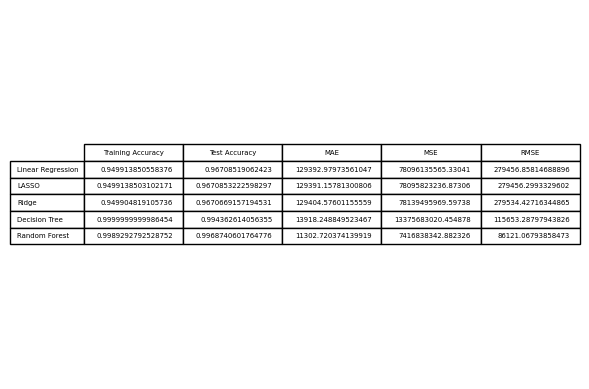

In [188]:
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax, scores, loc="center")
plt.savefig()

In [ ]:
fig, ax = plt.subplots(figsize=(5,2))
ax.axis("tight")
ax.axis("off")

After checking the MAE, MSE, and RMSE for each model, the best model appears to be the Random Forest model. While the Decision Tree has a higher train accuracy, it has a lower test accuracy, which further exemplifies its overfitting. Therefore, the Random Forest is the model that will be used to create the predictive web app.

In [184]:
with open('../models/co2_prediction_rf.pkl', 'wb') as f:
    pickle.dump(best_model5, f)

In [181]:
with open('../models/co2_prediction_dt.pkl', 'wb') as f:
    pickle.dump(best_model4, f)

After testing the Random Forest in the web app, I decided to also check the decision tree 